# Classification CIFAR100
Project 1 (Applied Deep Learning)


In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Download images.

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [0]:
batch_size = 32
#Augmentation of data
image_gen_train = ImageDataGenerator(
                    rotation_range=5,
                    width_shift_range=.15,
                    horizontal_flip=True
                    )

In [0]:
#@title Default title text

model = models.Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(32, 32 ,3), 
           kernel_regularizer=l2(l=0.0005)),
    BatchNormalization(),
    Dropout(0.5),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(l=0.0005)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(l=0.0005)),
    BatchNormalization(),
    MaxPooling2D((3,3)),
    Dropout(0.5),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(l=0.0005)),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.5),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(l=0.0005)),
    BatchNormalization(),
    Flatten(),
    Dense(100)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 64)       

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,  
                    batch_size=batch_size, epochs=100, 
                    steps_per_epoch= len(train_images)/batch_size,
                    validation_data=(test_images, test_labels))


Epoch 1/100
1563/1562 [==============================] - 11s 7ms/step - loss: 4.0633 - accuracy: 0.1038 - val_loss: 3.6549 - val_accuracy: 0.1594
Epoch 2/100
1563/1562 [==============================] - 11s 7ms/step - loss: 3.5170 - accuracy: 0.1893 - val_loss: 3.2732 - val_accuracy: 0.2329
Epoch 3/100
1563/1562 [==============================] - 11s 7ms/step - loss: 3.2528 - accuracy: 0.2387 - val_loss: 3.1060 - val_accuracy: 0.2792
Epoch 4/100
1563/1562 [==============================] - 11s 7ms/step - loss: 3.1204 - accuracy: 0.2688 - val_loss: 2.9752 - val_accuracy: 0.2987
Epoch 5/100
1563/1562 [==============================] - 11s 7ms/step - loss: 3.0404 - accuracy: 0.2885 - val_loss: 2.8126 - val_accuracy: 0.3468
Epoch 6/100
1563/1562 [==============================] - 11s 7ms/step - loss: 2.9693 - accuracy: 0.3035 - val_loss: 2.7392 - val_accuracy: 0.3593
Epoch 7/100
1563/1562 [==============================] - 11s 7ms/step - loss: 2.9243 - accuracy: 0.3166 - val_loss: 2.7220 -

In [0]:
# Uczenie z augmentacją
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,  
                    batch_size=batch_size, epochs=15, 
                    steps_per_epoch= len(train_images)/batch_size,
                    validation_data=(test_images, test_labels))
history = model.fit(image_gen_train.flow(train_images, train_labels, shuffle=True),  
                    batch_size=batch_size, initial_epoch=15, epochs=100, 
                    steps_per_epoch= len(train_images)/batch_size,
                    validation_data=(test_images, test_labels))


Epoch 1/15
1563/1562 [==============================] - 11s 7ms/step - loss: 4.1091 - accuracy: 0.0920 - val_loss: 3.7701 - val_accuracy: 0.1448
Epoch 2/15
1563/1562 [==============================] - 11s 7ms/step - loss: 3.5804 - accuracy: 0.1770 - val_loss: 3.4205 - val_accuracy: 0.2122
Epoch 3/15
1563/1562 [==============================] - 11s 7ms/step - loss: 3.3180 - accuracy: 0.2245 - val_loss: 3.0229 - val_accuracy: 0.2929
Epoch 4/15
1563/1562 [==============================] - 11s 7ms/step - loss: 3.1421 - accuracy: 0.2600 - val_loss: 3.0696 - val_accuracy: 0.2811
Epoch 5/15
1563/1562 [==============================] - 11s 7ms/step - loss: 3.0453 - accuracy: 0.2859 - val_loss: 2.9803 - val_accuracy: 0.2969
Epoch 6/15
1563/1562 [==============================] - 12s 7ms/step - loss: 2.9771 - accuracy: 0.3037 - val_loss: 2.8922 - val_accuracy: 0.3164
Epoch 7/15
1563/1562 [==============================] - 11s 7ms/step - loss: 2.9223 - accuracy: 0.3175 - val_loss: 2.7132 - val_ac

313/313 - 1s - loss: 2.4184 - accuracy: 0.4400


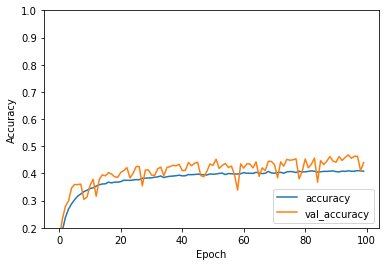

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


In [0]:
print(test_acc)


0.4399999976158142
